In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "sentiment-analysis-dataset"

# **Table of Contents**
--------------------
✅ **Load Libraries.**   
✅ **Import Data.**   
✅ **Data Transfromation & EDA.**   
✅ **Data Visualization.**   
✅ **ML Modeling & Prediction.**   

# **1. Load Libraries**

In [2]:
library(tidyverse)
library(tidymodels)
library(psych)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)
library(GGally)
library(lubridate)

########################
library(tm)
library(twitteR)
library(SnowballC)
library(wordcloud)
library(stringr)
library(tidytext)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/


Attaching package: ‘psych’


The following objects are masked from ‘package:scales’:

    alpha, rescale


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘gridExtra’


The following object is masked from ‘pac

# **2. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/sentiment-analysis-dataset/sentiment_data.csv') %>% janitor::clean_names() 

## **Data Description**
---------------------------
**This dataset is a large-scale collection of 241,000+ English-language comments sourced from various online platforms.**  
**Each comment is annotated with a sentiment.**

**label:**
0 : Negative,
1 : Neutral,
2 : Positive,

**Columns:**   
Comment : User-generated text content

[**Data Check**](https://www.kaggle.com/datasets/abdelmalekeladjelet/sentiment-analysis-dataset/data)

In [4]:
glimpse(df)

Rows: 241,145
Columns: 3
$ x         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ comment   <chr> "lets forget apple pay required brand new iphone order use s…
$ sentiment <int> 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, …


## **Summary**

In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,241145,1.212893e+05,6.970976e+04,121350,1.213497e+05,89381.5062,0,241925,241925,-0.004054025,-1.195750,1.419562e+02
comment*,2,241145,1.072973e+05,6.200930e+04,106107,1.072728e+05,79326.5130,1,214158,214157,0.012570146,-1.206151,1.262751e+02
sentiment,3,241145,1.198822e+00,7.851096e-01,1,1.248527e+00,1.4826,0,2,2,-0.365120465,-1.292678,1.598789e-03


In [6]:
summary(df)

       x            comment            sentiment    
 Min.   :     0   Length:241145      Min.   :0.000  
 1st Qu.: 61063   Class :character   1st Qu.:1.000  
 Median :121350   Mode  :character   Median :1.000  
 Mean   :121289                      Mean   :1.199  
 3rd Qu.:181636                      3rd Qu.:2.000  
 Max.   :241925                      Max.   :2.000  

In [7]:
df_skim <- skimr::skim(df)
print(df_skim)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             241145
Number of columns          3     
_______________________          
Column type frequency:           
  character                1     
  numeric                  2     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min  max empty n_unique whitespace
1 comment               0             1   0 5080   217   214158          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate      mean        sd p0   p25    p50
1 x                     0             1 121289.   69710.     0 61063 121350
2 sentiment             0             1      1.20     0.785  0     1      1
     p75   p100 hist 
1 181636 241925 ▇▇▇▇▇
2      2      2 ▅▁▆▁▇


## **Checking Missing Value & Duplicate Value**

In [8]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
x,0
comment,0
sentiment,0


In [9]:
sum(duplicated(df))

[1] 0

In [10]:
head(df, 3)

,x,comment,sentiment
,<int>,<chr>,<int>
1,0,lets forget apple pay required brand new iphone order use significant portion apples user base wasnt able use even wanted successive iphone incorporated technology older iphones replaced number people could use technology increased,1
2,1,nz retailers don’t even contactless credit card machines like paywave support apple pay don’t like high fees come,0
3,2,forever acknowledge channel help lessons ideas explanations quite helpful youll sit comfort monitor account growth,2


# **3. Data Transformation**

In [11]:
#Variable, target variable type conversion 
df <- df %>% select(-x) %>% mutate(across(
    c(
        'comment','sentiment'
     ),
    ~as.factor(.x)
    ))

In [12]:
head(df)

,comment,sentiment
,<fct>,<fct>
1,lets forget apple pay required brand new iphone order use significant portion apples user base wasnt able use even wanted successive iphone incorporated technology older iphones replaced number people could use technology increased,1
2,nz retailers don’t even contactless credit card machines like paywave support apple pay don’t like high fees come,0
3,forever acknowledge channel help lessons ideas explanations quite helpful youll sit comfort monitor account growth,2
4,whenever go place doesn’t take apple pay doesn’t happen often it’s drag ‘contactless covid’ habits getting apple card i’ve gotten used apple pay get seriously annoyed store doesn’t take feels like shock it’s crazy quickly took shopping routine i’ve officially brainwashed apple feels inconvenient even carry physical card pocket,0
5,apple pay convenient secure easy use used korean japanese airports need physical credit cards,2
6,we’ve hounding bank adopt apple pay understand don’t want extra fees easy quick checkout,1


# **3. Data Visualization**

## **Target Variables Ratio**

In [13]:
df2 <- df %>%  
        count(sentiment) %>%
        mutate(pct = paste(round(n / sum(n) * 100 ,1),'%'))

In [14]:
df2

sentiment,n,pct
<fct>,<int>,<chr>
0,55114,22.9 %
1,82972,34.4 %
2,103059,42.7 %


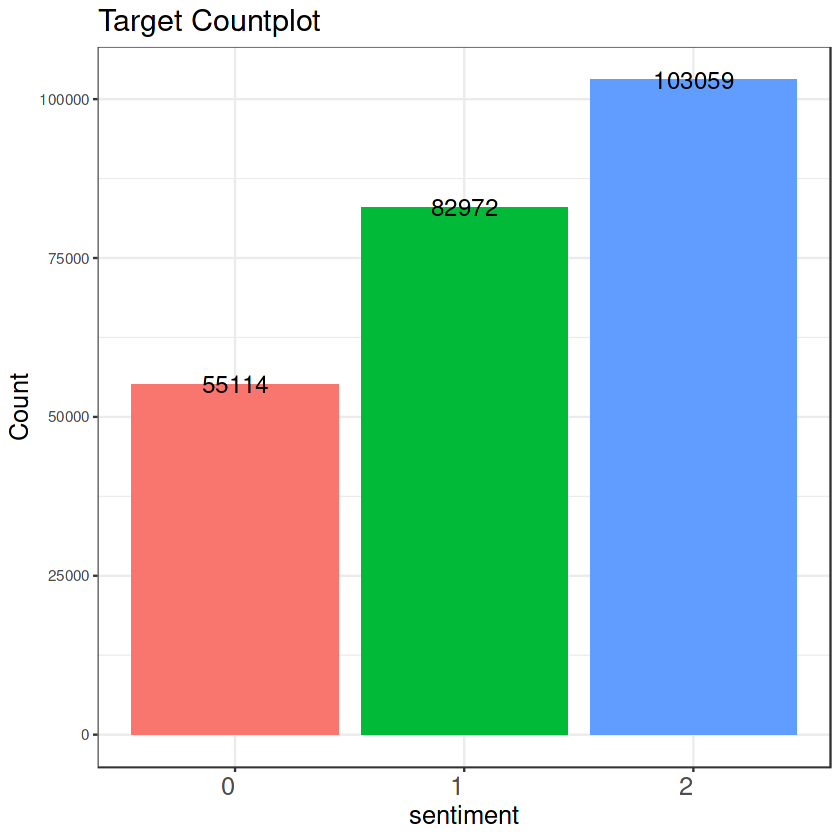

In [15]:
ggplot(df2) + geom_col(aes(x= sentiment, y = n, fill = sentiment)) + 
            geom_text(aes(x = sentiment , y = n , label = round(n,2)),size = 5)+
            labs(title = 'Target Countplot', y = 'Count') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

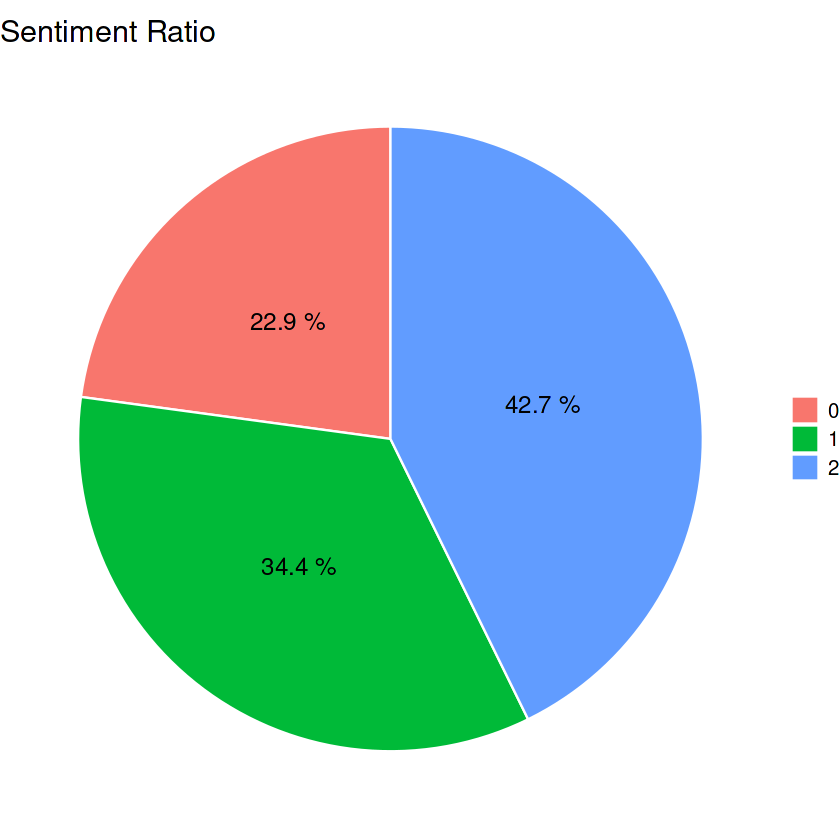

In [16]:
ggplot(df2, aes(x = "", y = n, fill = sentiment)) +
  geom_col(width = 1, color = "white") +  
  coord_polar("y", start = 0) +           
  geom_text(aes(label = pct), 
            position = position_stack(vjust = 0.5),
            size = 5) +                   
  labs(title = "Sentiment Ratio", y = "", x = "") +
  theme_void() +
  theme(
    title = element_text(size = 15),
    legend.title = element_blank(),
    legend.text = element_text(size = 12)
  )

## **WordCloud**

In [17]:
#Corpus 

corpus <- VCorpus(VectorSource(df$comment))
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 241145

In [18]:
#Word extraction

corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords('english'))
corpus <- tm_map(corpus, stemDocument)
corpus <- tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

[1] "let forget appl pay requir brand new iphon order use signific portion appl user base wasnt abl use even want success iphon incorpor technolog older iphon replac number peopl use technolog increas"

In [19]:
dtm <- DocumentTermMatrix(corpus)
dim(dtm)
dtm

[1] 241145 133214

<<DocumentTermMatrix (documents: 241145, terms: 133214)>>
Non-/sparse entries: 2866286/32121023744
Sparsity           : 100%
Maximal term length: 209
Weighting          : term frequency (tf)

In [20]:
#Remove sparse terms from a document-term or term-document matrix.

dtm <- removeSparseTerms(dtm, 0.999)

In [21]:
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)

wc <- data.frame(word=names(freq), freq=freq)
head(wc)

,word,freq
,<chr>,<dbl>
modi,modi,157427
india,india,29554
like,like,20306
peopl,peopl,16251
one,one,14640
time,time,14295


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


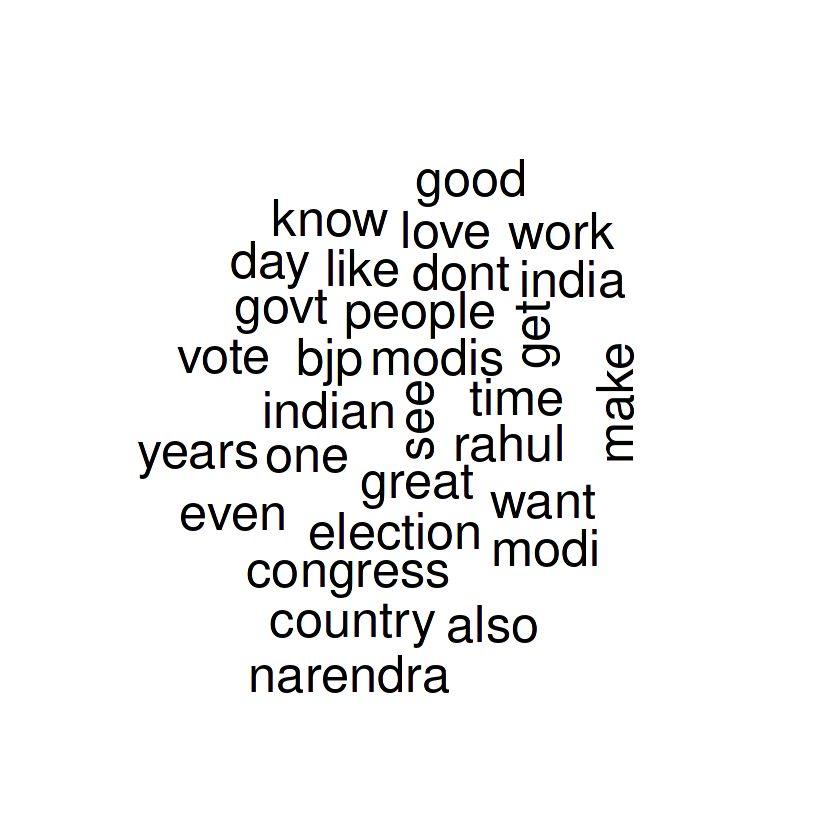

In [22]:
# Word cloud (sentiment == 0)
fake <- subset(df, sentiment == '0')
wordcloud(df$comment, max.words = 30, scale = c(2.5,2.5))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


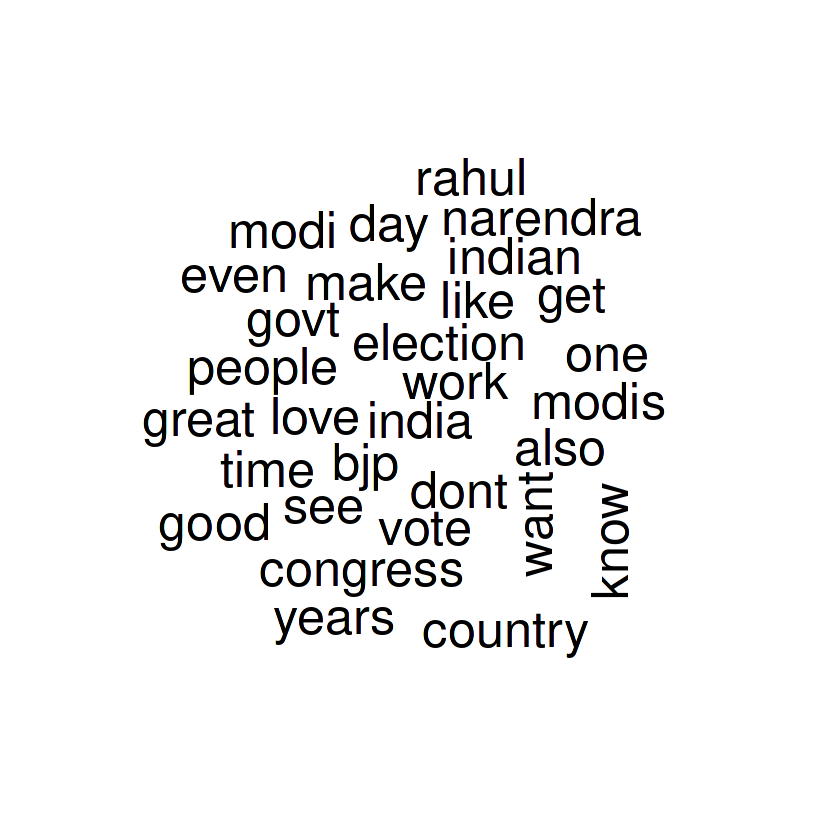

In [23]:
# Word cloud (sentiment == 1)
fake <- subset(df, sentiment == '1')
wordcloud(df$comment, max.words = 30, scale = c(2.5,2.5))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


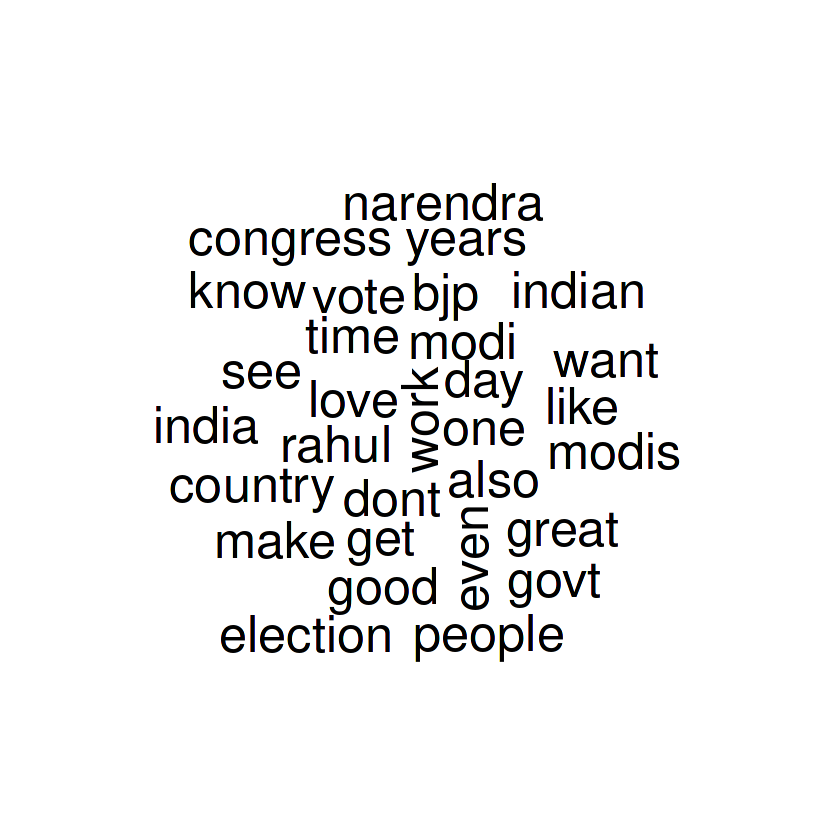

In [24]:
# Word cloud (sentiment == 2)
fake <- subset(df, sentiment == '2')
wordcloud(df$comment, max.words = 30, scale = c(2.5,2.5))

# **Text Lenght**

In [25]:
df <- df %>% select(comment, sentiment) %>%
  mutate(text_length = nchar(as.character(comment)))

Warning message in geom_histogram(aes(x = text_length), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


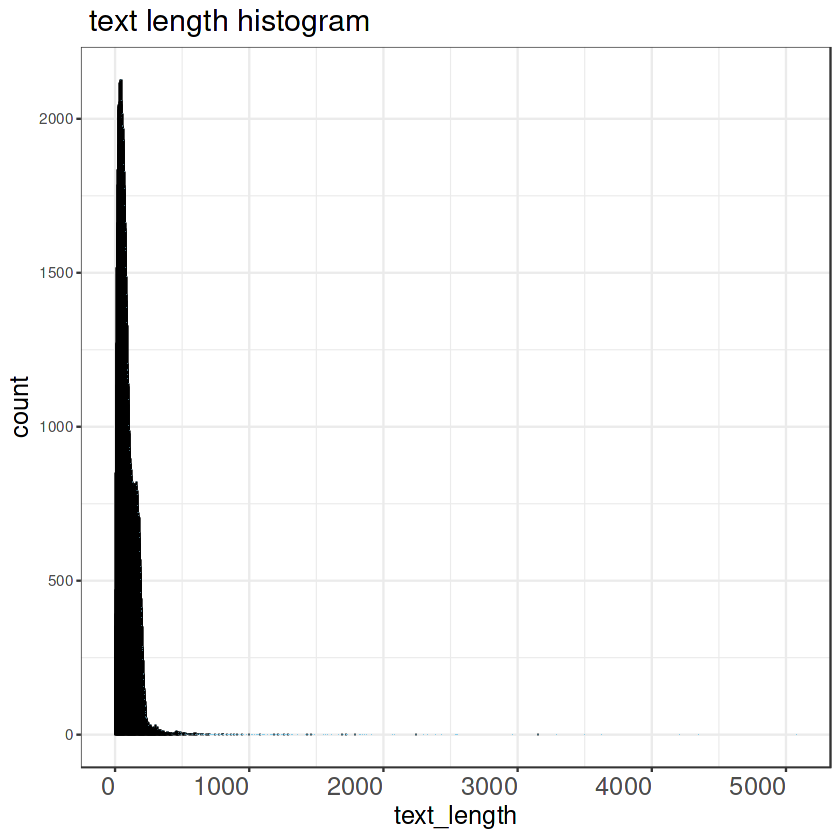

In [26]:
ggplot(df) + geom_histogram(aes(x= text_length), fill = 'skyblue', col = 'black', position = 'dodge', stat="count" ,bins = 30) + 
            labs(title = ' text length histogram', x = 'text_length') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

# **4. Modeling**

In [27]:
library(randomForest)
library(rpart)
library(tree)
library(caret)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [28]:
df$comment <- as.character(df$comment)

## **Tokenize**

In [29]:
df <- df %>% mutate(id = row_number())

tokens <- df %>%
  unnest_tokens(word, comment) %>%
  anti_join(stop_words, by = "word")

In [30]:
tfidf <- tokens %>%
  count(id, word) %>%
  bind_tf_idf(word, id, n)

In [31]:
top_tfidf_words <- tfidf %>%
  group_by(id) %>%
  slice_max(tf_idf, n = 50) %>%  # 필요시 숫자 조정
  ungroup()

In [32]:
dtm <- top_tfidf_words %>%
  cast_dtm(document = id, term = word, value = tf_idf)

In [33]:
word_counts <- tokens %>%
  count(id, word)

In [34]:
dtm <- word_counts %>%
  cast_dtm(document = id, term = word, value = n)

In [ ]:
dtm_df <- as.data.frame(as.matrix(dtm))
dtm_df$id <- as.integer(rownames(dtm_df))

In [ ]:
dtm_rf <- dtm_df %>%
  left_join(df %>% select(id, sentiment), by = "id") %>%
  select(-id)  

In [ ]:
dtm_rf$sentiment <- as.factor(dtm_rf$sentiment)

## **Train Test Split**

In [ ]:
train_index <- createDataPartition(dtm_rf$sentiment, p = 0.8, list = FALSE)
train_data <- dtm_rf[train_index, ]
test_data <- dtm_rf[-train_index, ]

## **RF Model**

In [ ]:
library(ranger)
rf_model <- ranger(sentiment ~ ., data = train_data, probability = FALSE, importance = "impurity")
print(rf_model)

In [ ]:
pred <- predict(rf_model, newdata = test_data)

In [ ]:
rf_cm <- confusionMatrix(pred, test_data$sentiment)

cm <- as.data.frame(rf_cm$table)

## **HeatMap**

In [ ]:
ggplot(cm, aes(x = Prediction, y = Reference, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), size = 5, fontface = "bold") +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix Heatmap",
       x = "Predicted",
       y = "Actual") +
  theme_minimal(base_size = 14)